In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score # For cross validation
from sklearn.model_selection import GridSearchCV # For searching over possible values of hyperparameters

# Kannada handwritten digit recognition

Today we will be using a dataset produced to provide training and test data for the task of recognising handwritten digits in the Kannada script. Kannada is a language spoken in South-western India, and is used by around 56 million people. Numerals are written in the Kannada script rather than Arabic numerals.

 - Training data was created by 65 volunteers from Bangalore, handwriting the digits 0 to 9 and were then digitised.
 - The data consists of 28 by 28 pixel greyscale images, with labels.
 
The dataset is similar to an existing dataset for Arabic numerals known as MNIST. The data are available [here](https://github.com/vinayprabhu/Kannada_MNIST) (but please use the version on BB for today!), and there is an academic paper about the dataset [here](https://arxiv.org/abs/1908.01242).

The data are stored in binary numpy format so that they can loaded directly into numpy arrays. To load them use np.load and read in the X and y training and test data.

In [2]:
train_x = np.load("Kannada_X_train.npy")
train_y = np.load("Kannada_y_train.npy")
test_x = np.load("Kannada_X_test.npy")
test_y = np.load("Kannada_y_test.npy")

Use the shape attribute to examine the size of the arrays. You should see they are three dimensional, which means they will have three indices.

In [11]:
test_y.shape

(500,)

To feed the data into our classifiers, we need to turn the images into one dimensional feature vectors. This can be done using the reshape method of the array. Use it to reshape the X training and test arrays to have dimension 1000x784 and 500x784. You will need to assign the result to a new variable.

```python
X_train_reshape = X_train.reshape(1000,784)
```

In [12]:
X_train_reshape = train_x.reshape(1000,784)
X_test_reshape = test_x.reshape(500,784)


Using the KNeighborsClassifier model from scikit-learn, train and test the model on the data. You should use cross-validation on the training data to select the number of neighbours to use. Try a range of neighbours between 1 and 10.

In [23]:
KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(X_train_reshape,train_y)
KNN.score(X_test_reshape, test_y)

cross_val_score(KNN,X_train_reshape,train_y,cv=10)


array([0.96, 0.95, 0.98, 1.  , 0.98, 1.  , 0.99, 0.98, 0.91, 0.97])

We can use the kneighbors method of a model that has been trained to find the K nearest neighbours of an input image. It returns an array of the distances, followed by an array of the indices of the nearest neighbours. Try using your model to predict y and find an image that is predicted incorrectly. Plot this image, then see if you can plot the images of the K nearest neighbours.

*You may need to use something like:*

```python
knn_model.kneighbors(X_reshaped[[1],:])
```

*as the model expects the X input to be a two dimensional array, where features are on columns, and data points on rows, even when there is only one feature or one data point. Using indexing as X_reshaped[1,:] will drop the first axis and return a one dimensional array, and cause an error. By placing the index in a list keeps that axis in the returned array.*

In [39]:
#KNN.kneighbors(X_train_reshape[[1],:])
KNN.predict(X_test_reshape)

array([0, 0, 0, 3, 4, 3, 6, 4, 8, 9, 0, 1, 2, 3, 4, 3, 3, 3, 0, 9, 0, 1,
       2, 3, 4, 5, 6, 3, 8, 9, 3, 1, 2, 3, 4, 4, 6, 3, 0, 9, 3, 1, 2, 3,
       4, 3, 6, 3, 8, 9, 1, 1, 2, 3, 4, 5, 6, 3, 8, 9, 0, 1, 2, 3, 4, 3,
       6, 3, 8, 3, 0, 1, 2, 3, 3, 4, 6, 4, 8, 3, 0, 3, 2, 3, 4, 4, 6, 9,
       8, 9, 1, 1, 2, 3, 4, 5, 5, 9, 8, 9, 0, 1, 2, 3, 4, 4, 3, 3, 8, 9,
       8, 1, 2, 3, 4, 3, 6, 3, 8, 9, 0, 3, 2, 3, 4, 4, 3, 3, 8, 9, 3, 1,
       2, 3, 4, 4, 3, 4, 8, 9, 0, 0, 2, 3, 4, 4, 6, 9, 8, 9, 0, 1, 2, 3,
       4, 3, 6, 3, 8, 3, 0, 1, 2, 3, 4, 4, 6, 3, 8, 9, 0, 1, 2, 3, 4, 4,
       3, 4, 8, 9, 0, 1, 2, 3, 4, 3, 3, 4, 8, 3, 8, 1, 2, 3, 4, 3, 6, 3,
       8, 9, 0, 1, 2, 3, 4, 4, 6, 6, 8, 9, 0, 0, 2, 3, 4, 4, 3, 4, 8, 9,
       0, 1, 3, 3, 4, 4, 6, 3, 8, 9, 0, 1, 2, 3, 4, 3, 3, 3, 8, 9, 1, 3,
       2, 3, 4, 4, 5, 4, 8, 9, 0, 1, 2, 3, 4, 4, 3, 3, 0, 9, 0, 1, 5, 3,
       4, 3, 3, 4, 8, 9, 0, 1, 2, 3, 4, 3, 3, 3, 8, 9, 0, 3, 2, 3, 4, 3,
       2, 4, 8, 9, 0, 1, 2, 3, 4, 4, 6, 4, 0, 9, 0,

In [34]:
KNN.kneighbors(X_test_reshape[[1],:])

(array([[1353.62217771, 1493.72219639, 1530.16731111, 1535.43739697,
         1543.90640908, 1575.41169223]]),
 array([[741,  61,   1,  30, 350,  80]]))

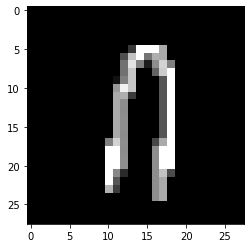

In [38]:
plt.imshow(test_x[1,:,:],cmap="gray")

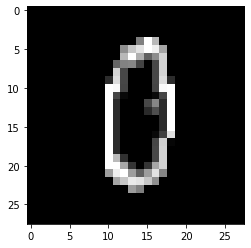

In [41]:
plt.imshow(train_x[350,:,:],cmap="gray")

Now try using a support vector machine classifier with the scikit-learn SVC model. The default values for C and gamma (the RBF kernel parameter) will not perform well. Use a search over these parameters on the training data to find a good setting for the hyperparameters:

```python
grid = {"C":[1,10,100,1000],"gamma":[1e-12,1e-8,1e-4]}
```

In [44]:
grid = {"C":[1,10,100,1000],"gamma":[1e-12,1e-8,1e-4]}
SVM = SVC(gamma = 'auto')
SVM.fit(X_train_reshape, train_y)
SVM.score(X_test_reshape, test_y)
model_cv = GridSearchCV(SVM,grid,cv=10,iid=False)
model_cv.fit(X_train_reshape, train_y)
model_cv.best_params_

{'C': 10, 'gamma': 1e-08}

Finally, score your optimal SVM parameters on the test data.

In [65]:
SVM = SVC(gamma = 1e-08, C = 10)
SVM.fit(X_train_reshape, train_y)
SVM.score(X_test_reshape, test_y)

0.678

# SVM Regression for predicting sales

We have data from a company giving figures for sales, along with the advertising budget for TV adverts. Load the data into a pandas dataframe using 

```python
data = pd.read_csv("AdvertisingTV.csv")
```

In [45]:
data = pd.read_csv("AdvertisingTV.csv")

Now try fitting an SVM regression model to the data using the scikit-learn SVR model. As a starting point try setting C=1000, gamma=1e-4 and epsilon=1 (epsilon is eta in the lecture slides).

You can use X=data['TV'].values and y=data['sales'].values to extract the X and y values.

In [67]:
model = SVR(C=1000, gamma=1e-4, epsilon=1 )
X=data['TV'].values
y=data['sales'].values
model.fit(X.reshape(-1, 1),y)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

See if you can plot the regression predictions as well as the support vectors on a plot, and see how this changes as you change the hyperparameters. To generate predictions of y for a range of x values you can use:

```python
xs = np.arange(1,300,1)
ys = svr_model.predict(xs.reshape(-1, 1))
```

To plot the data points, regression line and support vectors (in red) you can then use:

```python
plt.scatter(X,y)
plt.plot(xs,ys)
plt.scatter(X[svr_model.support_],y[svr_model.support_],color="red")
```

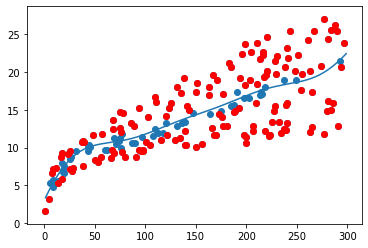

In [69]:
xs = np.arange(1,300,1)
ys = model.predict(xs.reshape(-1, 1))
plt.scatter(X,y)
plt.plot(xs,ys)
plt.scatter(X[model.support_],y[model.support_],color="red")